In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import strategy

In [6]:
df = pd.read_csv("Gemini_BTCUSD_1h.csv", parse_dates=["date"])

In [20]:
closings = df["close"][:8000]

executor = strategy.StrategyExecutor()
params = strategy.LinRegStrategyParams()

executor.addStrategy(strategy.LinRegStrategy(params))

baseline, usd = executor.backtest(0.26/1000, closings)
print("Baseline: " + str(baseline) + " Strategy: " + str(usd))

Baseline: 65.53560448042889 Strategy: 169.90750550399588


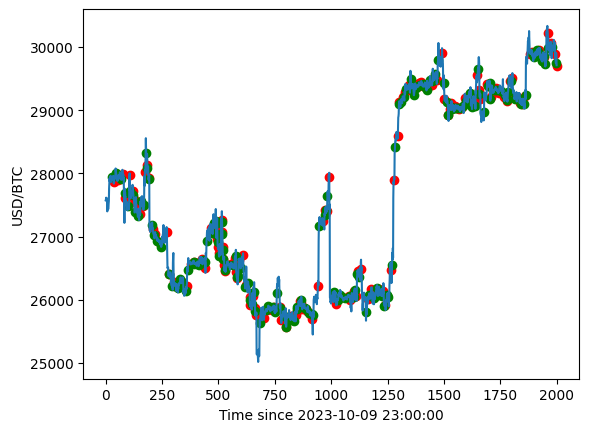

In [8]:
sells_x, sells_y = [], []
buys_x, buys_y = [], []

for (time, price, buy) in executor.getTransactions():
  if buy:
    buys_x.append(time)
    buys_y.append(price)
  else:
    sells_x.append(time)
    sells_y.append(price)

plt.plot(closings)
plt.scatter(sells_x, sells_y, c="red")
plt.scatter(buys_x, buys_y, c="green")
plt.ylabel("USD/BTC")
plt.xlabel("Time since " + str(df["date"][0]))
plt.show()